In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy as sp
import glob
from mpl_toolkits.mplot3d import Axes3D

pylab.rcParams['figure.figsize'] = (22.0, 11.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
obs = pd.read_csv('/RHESSys/Comocreek/barnhatb/obs/como_discharge_real_clean.csv', sep=',', header='infer')              

In [3]:
obs.index = pd.date_range(start='2004-01-01',freq='D', periods = len(obs.q_liter_per_day))

In [4]:
obs = obs.drop(['year','doy'], axis = 1)

# Convert Observed Streamflow from L/d to mm/d

In [5]:
area = 5003242.70891233 # m^2 area upstream of the gauge

In [6]:
streamflow = obs.q_liter_per_day

In [7]:
streamflow = streamflow*0.001 # convert to m3/d

In [8]:
streamflow = streamflow/area # covert to m/d

In [9]:
obs['discharge'] = streamflow*1000 # convert to mm/d

## Plot the Daily Data

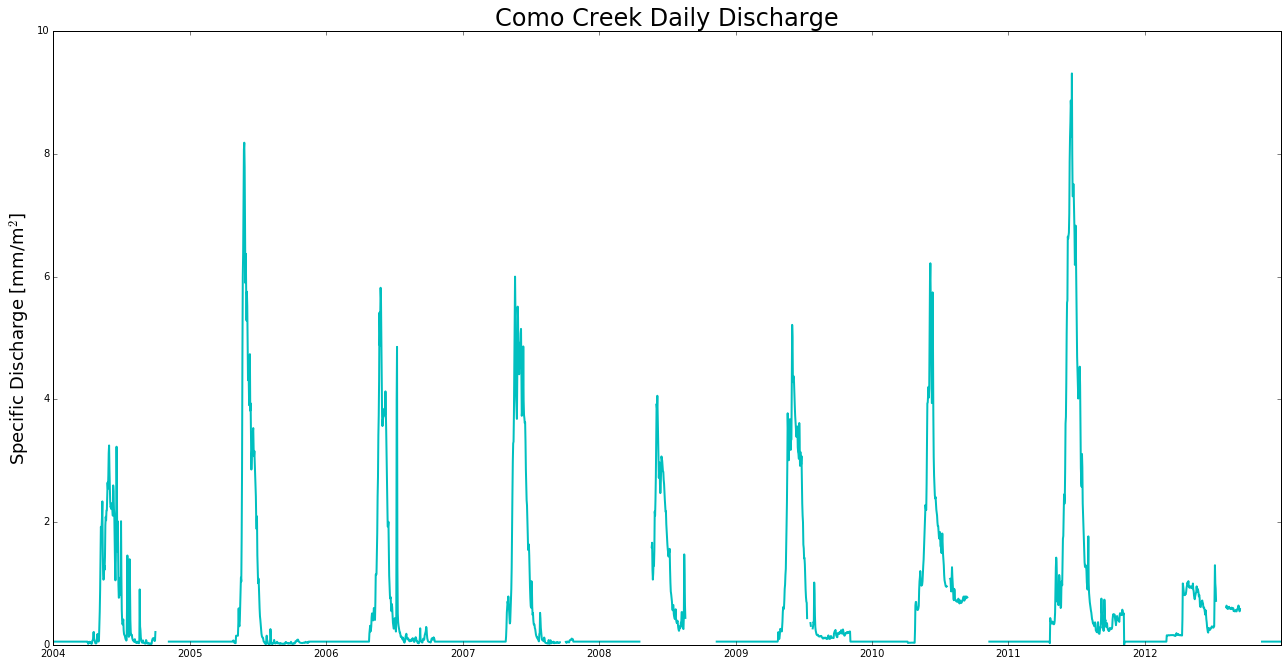

In [10]:
ax1 = plt.plot(obs.index, obs.discharge, 'c-', lw=2)
plt.ylabel('Specific Discharge [mm/m$^2$]', fontsize = 18)
plt.title('Como Creek Daily Discharge', fontsize = 24);

In [13]:
print 'Start',obs.index.min()
print 'Stop',obs.index.max()

Start 2004-01-01 00:00:00
Stop 2012-12-31 00:00:00


## Save the Daily Data

In [11]:
obs.to_pickle('./Comocreek/barnhatb/obs/como_specific_discharge_daily.pcl')